In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cost_matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

lambdas_l = np.array([0.25, 1.0, 5.0])
lambdas_w = np.array([0.1, 0.5, 2.0])

C = 1.0
n_areas = cost_matrix.shape[0]

In [3]:
lambdas_w + np.reshape(lambdas_l, (n_areas, 1))

array([[0.35, 0.75, 2.25],
       [1.1 , 1.5 , 3.  ],
       [5.1 , 5.5 , 7.  ]])

In [4]:
reconstructed_correspondence_matrix_vectorized = (
   np.exp(-1 - cost_matrix / C) *
   np.exp(np.reshape(-lambdas_l, (n_areas, 1)) - lambdas_w)
)

In [5]:
reconstructed_correspondence_matrix_raw = np.zeros((n_areas, n_areas))
for i in range(n_areas):
    for j in range(n_areas):
        reconstructed_correspondence_matrix_raw[i, j] = (
            np.exp(-lambdas_l[i] - lambdas_w[j] - 1 - cost_matrix[i, j] / C)
        )

In [6]:
reconstructed_correspondence_matrix_vectorized

array([[9.53691622e-02, 2.35177459e-02, 1.93045414e-03],
       [2.24286772e-03, 5.53084370e-04, 4.53999298e-05],
       [2.04523062e-06, 5.04347663e-07, 4.13993772e-08]])

In [7]:
reconstructed_correspondence_matrix_raw

array([[9.53691622e-02, 2.35177459e-02, 1.93045414e-03],
       [2.24286772e-03, 5.53084370e-04, 4.53999298e-05],
       [2.04523062e-06, 5.04347663e-07, 4.13993772e-08]])

In [8]:
norm_living_people = np.array([100, 200, 300])
norm_working_people = np.array([8, 16, 64])

lambdas_l = np.array([0.25, 1.0, 5.0])
lambdas_w = np.array([0.1, 0.5, 2.0])

In [9]:
for iter_idx in range(2):
    if iter_idx % 2 == 0:
        new_lambdas_w = lambdas_w
        new_lambdas_l = np.log(np.sum(
            (np.exp(-lambdas_w - 1 - cost_matrix / C)).T
            / norm_living_people, axis=0
        ))
        print(new_lambdas_l)
    else:
        new_lambdas_l = lambdas_l
        new_lambdas_w = np.log(np.sum(
            (np.exp(-lambdas_l - 1 - cost_matrix.T / C)).T
            / norm_working_people, axis=0
        ))
        
    lambdas_l = new_lambdas_l
    lambdas_w = new_lambdas_w

[ -6.46864546 -10.16179264 -13.56725775]


In [10]:
lambdas_l

array([ -6.46864546, -10.16179264, -13.56725775])

In [11]:
lambdas_w

array([4.18096339, 2.48781621, 0.10152185])

In [12]:
lambdas_l = np.array([0.25, 1.0, 5.0])
lambdas_w = np.array([0.1, 0.5, 2.0])

In [13]:
for iter_idx in range(2):
    if iter_idx % 2 == 0:
        for i in range(n_areas):
            summa = 0
            for j in range(n_areas):
                summa += (
                    np.exp(-lambdas_w[j]) / norm_living_people[i]
                    / np.exp(1 + cost_matrix[i, j] / C)
                )
            lambdas_l[i] = np.log(summa)
    else:
        for j in range(n_areas):
            summa = 0
            for i in range(n_areas):
                summa += (
                    np.exp(-lambdas_l[i]) / norm_working_people[j]
                    / np.exp(1 + cost_matrix[i, j] / C)
                )
            lambdas_w[j] = np.log(summa)

In [14]:
lambdas_l

array([ -6.46864546, -10.16179264, -13.56725775])

In [15]:
lambdas_w

array([4.18096339, 2.48781621, 0.10152185])

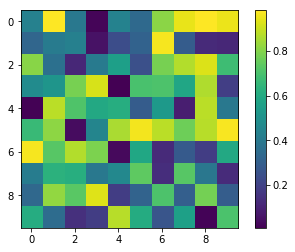

In [10]:
a = np.random.rand(10, 10)

plt.imshow(a, cmap='viridis')
plt.colorbar()

(1000, 1000)


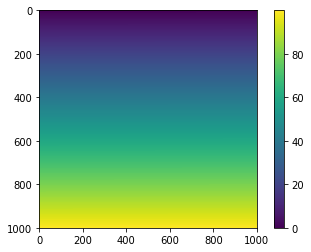

In [20]:
import matplotlib.pyplot as plt
import numpy as np


def heatmap2d(arr):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()


test_array = np.arange(1000 * 1000).reshape(1000, 1000) / 10000
print(test_array.shape)
heatmap2d(test_array)

In [14]:
test_array

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])